# Practica 39 - Operaciones con pandas sobre un 'json nested'

## Analizar con pandas el archivo anidado `companies.json`

### Rehacer los códigos del notebook `JSON_Limpiar.ipynb` a partir de la `Sección 2- Análisis JSON anidado con Pandas` Desde la celda de código 25.
- Añadir algunos cálculos de estadísticas descriptivas básicas (todos los que ud. quiera) sobre el dataframe final y guardar en otro dataframe dichos cálculos estádisticos. De forma opcional añada algunos 'plots' con matplotlib si quiere.

In [2]:
import pandas as pd

In [3]:
import json

In [5]:
# Carga el archivo JSON
ruta_del_archivo = r"C:\Users\nanaw\Documents\Estudio Angelica\Tajamar\Data science\MODULO 7\Curso_Pandas\Notebook\Prácticas\Práctica-39\companies.json"

with open(ruta_del_archivo) as json_file:
    json_data = json.load(json_file)

# Aplana la estructura anidada
df = pd.json_normalize(json_data['companies'], record_path='employees', meta='company')

# Muestra los datos aplanados en un DataFrame
print(df)

             name  age                                   skills  salary  \
0        John Doe   30                  [Python, Data Analysis]    3450   
1      Jane Smith   25                      [JavaScript, React]    2800   
2    Mike Johnson   35                           [Java, Spring]    4200   
3     Alice Brown   28                            [Ruby, Rails]    3100   
4       Bob White   32                           [PHP, Laravel]    2300   
5   Charlie Green   29                             [AWS, Azure]    3700   
6       Dana Blue   27                            [GCP, Docker]    2700   
7       Eva Black   33                      [TensorFlow, Keras]    4500   
8     Frank White   36                  [PyTorch, SciKit-Learn]    5100   
9    George Brown   31  [Network Security, Penetration Testing]    3900   
10   Hannah White   26                     [Cryptography, SIEM]    3400   
11     Ivan Black   30            [Blockchain, Smart Contracts]    3600   
12     Judy White   28   

In [6]:
df

,name,age,skills,salary,address.street,address.city,address.zipcode,company
0,John Doe,30,"[Python, Data Analysis]",3450,123 Main St,New York,10001,Tech Solutions
1,Jane Smith,25,"[JavaScript, React]",2800,456 Market St,San Francisco,94105,Tech Solutions
2,Mike Johnson,35,"[Java, Spring]",4200,789 Broadway,Los Angeles,90015,Tech Solutions
3,Alice Brown,28,"[Ruby, Rails]",3100,101 First Ave,Seattle,98101,Innovative Apps
4,Bob White,32,"[PHP, Laravel]",2300,202 Second Ave,Austin,73301,Innovative Apps
5,Charlie Green,29,"[AWS, Azure]",3700,303 Third St,Chicago,60601,Cloud Services
6,Dana Blue,27,"[GCP, Docker]",2700,404 Fourth St,Miami,33101,Cloud Services
7,Eva Black,33,"[TensorFlow, Keras]",4500,505 Fifth Ave,Boston,02101,AI Innovations
8,Frank White,36,"[PyTorch, SciKit-Learn]",5100,606 Sixth Ave,Denver,80201,AI Innovations
9,George Brown,31,"[Network Security, Penetration Testing]",3900,707 Seventh St,Houston,77001,Cyber Security Inc


Limpieza de datos

Tratamiento de valores perdidos
Tratemos los valores que faltan en nuestro DataFrame.

In [15]:
# Comprobar valores faltantes
#def.isma:Este método crea un DataFrame booleano con el mismo tamaño que df, 
#donde cada celda contiene True si el valor correspondiente en df es NaN y False en caso contrario.

print(df.isna().sum())

#.sum(): Luego, aplicamos la función sum() al DataFrame booleano. Esto suma los valores booleanos a
# lo largo de las columnas. Como True se interpreta como 1 y False como 0, la suma nos da la cantidad 
# total de valores True (es decir, valores NaN) en cada columna.


# Complete los valores faltantes con un marcador de posición o elimine filas/columnas con valores faltantes
# Ejemplo: completar los valores faltantes con 'Desconocido'

df.fillna('Unknown', inplace=True)

#En resumen, esta línea de código reemplaza los valores faltantes en el DataFrame df con la cadena 'Unknown'
#y actualiza el DataFrame original directamente. Es útil cuando queremos limpiar o preparar nuestros datos antes de realizar análisis o visualizaciones

name       0
age        0
skills     0
salary     0
street     0
city       0
zidcode    0
company    0
dtype: int64


Renombrar Columnas

In [7]:
df.rename(columns={
    'address.street':'street',
    'address.city': 'city',
    'address.zipcode':'zidcode'
 },inplace = True  )
print(df.head())

           name  age                   skills  salary          street  \
0      John Doe   30  [Python, Data Analysis]    3450     123 Main St   
1    Jane Smith   25      [JavaScript, React]    2800   456 Market St   
2  Mike Johnson   35           [Java, Spring]    4200    789 Broadway   
3   Alice Brown   28            [Ruby, Rails]    3100   101 First Ave   
4     Bob White   32           [PHP, Laravel]    2300  202 Second Ave   

            city zidcode          company  
0       New York   10001   Tech Solutions  
1  San Francisco   94105   Tech Solutions  
2    Los Angeles   90015   Tech Solutions  
3        Seattle   98101  Innovative Apps  
4         Austin   73301  Innovative Apps  


Cambiar los tipos de datos
Vamos a mirar si los tipos de datos son los adecuados para el análisis

In [14]:
print(df.dtypes)

name       object
age         int64
skills     object
salary      int64
street     object
city       object
zidcode    object
company    object
dtype: object


In [8]:
df['age'] = df['age'].astype('float64')
print(df.dtypes)

name        object
age        float64
skills      object
salary       int64
street      object
city        object
zidcode     object
company     object
dtype: object


In [9]:
df['age'] = df['age'].astype(int)
print(df.dtypes)

name       object
age         int64
skills     object
salary      int64
street     object
city       object
zidcode    object
company    object
dtype: object


Ampliación de las columnas de la lista
Vamos aseparar columnas con listas o skills, se pueden ampliar a filas o columnas separadas

In [17]:
# Expandir la columna 'habilidades'
skills_expanded = df['skills'].apply(pd.Series)
skills_expanded.columns = [f'skill_{i+1}' for i in skills_expanded.columns]

# Concatenar las habilidades expandidas al DataFrame original
df = pd.concat([df.drop(columns = 'skills'), skills_expanded], axis=1)
print(df.head)


<bound method NDFrame.head of              name  age  salary                street            city zidcode  \
0        John Doe   30    3450           123 Main St        New York   10001   
1      Jane Smith   25    2800         456 Market St   San Francisco   94105   
2    Mike Johnson   35    4200          789 Broadway     Los Angeles   90015   
3     Alice Brown   28    3100         101 First Ave         Seattle   98101   
4       Bob White   32    2300        202 Second Ave          Austin   73301   
5   Charlie Green   29    3700          303 Third St         Chicago   60601   
6       Dana Blue   27    2700         404 Fourth St           Miami   33101   
7       Eva Black   33    4500         505 Fifth Ave          Boston   02101   
8     Frank White   36    5100         606 Sixth Ave          Denver   80201   
9    George Brown   31    3900        707 Seventh St         Houston   77001   
10   Hannah White   26    3400         808 Eighth St          Dallas   75201   
11     Iva

Guardar el DataFrame modificado a csv

In [18]:
ruta_completa = ruta_del_archivo
df.to_csv('cleaned_data.csv', index=False)
print("DataFrame saved to 'cleaned_data.csv'") 

DataFrame saved to 'cleaned_data.csv'


df.to_csv('cleaned_data.csv', index=False): Esta línea guarda el DataFrame df en un archivo CSV llamado “cleaned_data.csv”. El parámetro index=False evita que se guarde el índice de las filas como una columna adicional en el archivo CSV.
print("DataFrame saved to 'cleaned_data.csv'"): Aquí simplemente imprimimos un mensaje en la consola para informar al usuario que el DataFrame se ha guardado correctamente en el archivo “cleaned_data.csv”.
Este código guarda el DataFrame en un archivo CSV y muestra un mensaje para confirmar que la operación se realizó con éxito.

2 parte : Algunos cálculos de estadísticas descriptivas básicas 

In [20]:
df

,name,age,salary,street,city,zidcode,company,skill_1,skill_2
0,John Doe,30,3450,123 Main St,New York,10001,Tech Solutions,Python,Data Analysis
1,Jane Smith,25,2800,456 Market St,San Francisco,94105,Tech Solutions,JavaScript,React
2,Mike Johnson,35,4200,789 Broadway,Los Angeles,90015,Tech Solutions,Java,Spring
3,Alice Brown,28,3100,101 First Ave,Seattle,98101,Innovative Apps,Ruby,Rails
4,Bob White,32,2300,202 Second Ave,Austin,73301,Innovative Apps,PHP,Laravel
5,Charlie Green,29,3700,303 Third St,Chicago,60601,Cloud Services,AWS,Azure
6,Dana Blue,27,2700,404 Fourth St,Miami,33101,Cloud Services,GCP,Docker
7,Eva Black,33,4500,505 Fifth Ave,Boston,02101,AI Innovations,TensorFlow,Keras
8,Frank White,36,5100,606 Sixth Ave,Denver,80201,AI Innovations,PyTorch,SciKit-Learn
9,George Brown,31,3900,707 Seventh St,Houston,77001,Cyber Security Inc,Network Security,Penetration Testing


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     21 non-null     object
 1   age      21 non-null     int64 
 2   salary   21 non-null     int64 
 3   street   21 non-null     object
 4   city     21 non-null     object
 5   zidcode  21 non-null     object
 6   company  21 non-null     object
 7   skill_1  21 non-null     object
 8   skill_2  21 non-null     object
dtypes: int64(2), object(7)
memory usage: 1.6+ KB


In [21]:
df_resumen = df["age"].describe()
print("\n Resumen de las principales estadisticas descriptivas")
df_resumen


 Resumen de las principales estadisticas descriptivas


count    21.000000
mean     29.857143
std       3.037856
min      25.000000
25%      28.000000
50%      30.000000
75%      32.000000
max      36.000000
Name: age, dtype: float64

- count: Este valor representa la cantidad total de observaciones en la columna “age”. En este caso, hay 21 observaciones.
- mean (media): La media es el promedio de todos los valores en la columna “age”. En este conjunto de datos, la media es aproximadamente 29.86.
- std (desviación estándar): La desviación estándar mide la dispersión o variabilidad de los valores en la columna “age”. Cuanto mayor sea la desviación estándar, más dispersos estarán los datos alrededor de la media. En este caso, la desviación estándar es aproximadamente 3.04.
- min (valor mínimo): Este es el valor más pequeño en la columna “age”. Aquí, el valor mínimo es 25.
- 25% (percentil 25): El percentil 25 (o primer cuartil) es el valor que divide el conjunto de datos en dos partes iguales, donde el 25% de los valores son menores o iguales a este valor. En este caso, el percentil 25 es 28.
- 50% (percentil 50 o mediana): La mediana es el valor medio en el conjunto de datos. El 50% de los valores son menores o iguales a este valor, y el otro 50% son mayores. Aquí, la mediana es 30.
- 75% (percentil 75): El percentil 75 (o tercer cuartil) es el valor que divide el conjunto de datos en dos partes iguales, donde el 75% de los valores son menores o iguales a este valor. En este caso, el percentil 75 es 32.
- max (valor máximo): Este es el valor más grande en la columna “age”. Aquí, el valor máximo es 36.
Estos estadísticos proporcionan una visión general de la distribución de edades en el conjunto de datos

In [22]:
print(df.shape) #Tupla con número de filas y el número de columnas DataFrame
print(len(df))  # Se obtiene el número de filas
print(df.size)   #  Se obtiene el número de elementos de la dataFrame 21 x 9
print(df.ndim)   # Se ve el número de dimensiones de la DataFrame

(21, 9)
21
189
2


In [23]:
indices_columnas = df.columns
print(indices_columnas)

Index(['name', 'age', 'salary', 'street', 'city', 'zidcode', 'company',
       'skill_1', 'skill_2'],
      dtype='object')


In [24]:
df_primeras_6 = df.iloc[:6]
df_primeras_6 

,name,age,salary,street,city,zidcode,company,skill_1,skill_2
0,John Doe,30,3450,123 Main St,New York,10001,Tech Solutions,Python,Data Analysis
1,Jane Smith,25,2800,456 Market St,San Francisco,94105,Tech Solutions,JavaScript,React
2,Mike Johnson,35,4200,789 Broadway,Los Angeles,90015,Tech Solutions,Java,Spring
3,Alice Brown,28,3100,101 First Ave,Seattle,98101,Innovative Apps,Ruby,Rails
4,Bob White,32,2300,202 Second Ave,Austin,73301,Innovative Apps,PHP,Laravel
5,Charlie Green,29,3700,303 Third St,Chicago,60601,Cloud Services,AWS,Azure


In [25]:
df_ultimas_4 = df.tail(4)
df_ultimas_4

,name,age,salary,street,city,zidcode,company,skill_1,skill_2
17,Oscar Brown,30,4800,1515 Fifteenth Ave,Las Vegas,89101,Game Development Co,Unity,Unreal Engine
18,Pat White,26,3600,1616 Sixteenth Ave,Salt Lake City,84101,Game Development Co,Game Design,3D Modeling
19,Quinn Brown,28,3200,1717 Seventeenth Ave,Minneapolis,55401,EdTech Innovations,Moodle,Canvas
20,Riley White,31,4000,1818 Eighteenth Ave,Atlanta,30301,EdTech Innovations,Blackboard,Schoology


In [26]:
correlacion = df['age'].corr(df['salary'])
correlacion


np.float64(0.5609548465504424)

In [31]:
age_salary = df.groupby('age')['salary'].mean()

# Imprimir el resultado
print(age_salary)

age
25    2800.000000
26    3500.000000
27    3250.000000
28    3066.666667
29    3450.000000
30    3950.000000
31    3950.000000
32    2600.000000
33    4500.000000
34    4300.000000
35    4200.000000
36    5100.000000
Name: salary, dtype: float64


In [32]:
import matplotlib.pyplot as plt


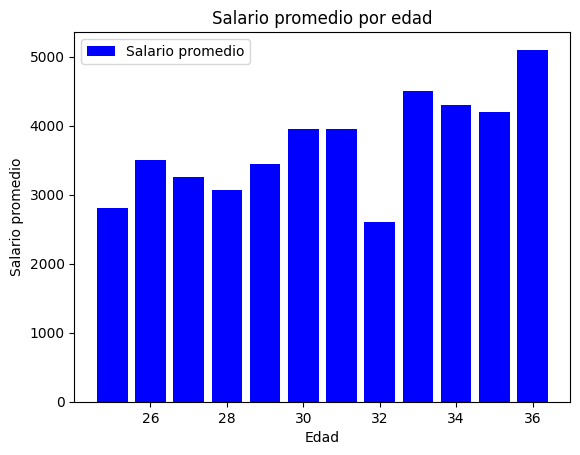

In [33]:
# Datos
edades = age_salary.index
salarios_promedio = age_salary.values

# Crear el gráfico de barras
plt.bar(edades, salarios_promedio, color='b', label='Salario promedio')

# Etiquetas de los ejes
plt.xlabel('Edad')
plt.ylabel('Salario promedio')

# Título del gráfico
plt.title('Salario promedio por edad')

# Mostrar la leyenda

plt.legend()

# Mostrar el gráfico
plt.show()